# **Importing the necessary libraries**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import image_dataset_from_directory
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
from keras.losses import SparseCategoricalCrossentropy
from keras.preprocessing.image import load_img

# **Exploratory Data Analysis**

### **Loading the file paths**

In [8]:
input_path = []
label = []

for class_name in os.listdir("D:\\Work\\My work\\Sem 3 research papers\\Potato leaf disease\\data"):
    for path in os.listdir("D:\\Work\\My work\\Sem 3 research papers\\Potato leaf disease\\data/"+class_name):
        if class_name == "Early_blight":
            label.append(0)
        if class_name =="Healthy":
            label.append(1)
        if class_name == "Late_blight":
            label.append(2)
        input_path.append(os.path.join("D:\\Work\\My work\\Sem 3 research papers\\Potato leaf disease\\data",class_name,path))

In [9]:
label

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [10]:
df = pd.DataFrame()
df["images"] = input_path
df["label"] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

images  label
0  D:\Work\My work\Sem 3 research papers\Potato l...      2
1  D:\Work\My work\Sem 3 research papers\Potato l...      1
2  D:\Work\My work\Sem 3 research papers\Potato l...      2
3  D:\Work\My work\Sem 3 research papers\Potato l...      0
4  D:\Work\My work\Sem 3 research papers\Potato l...      2

### **Printing images of Healthy leaves**

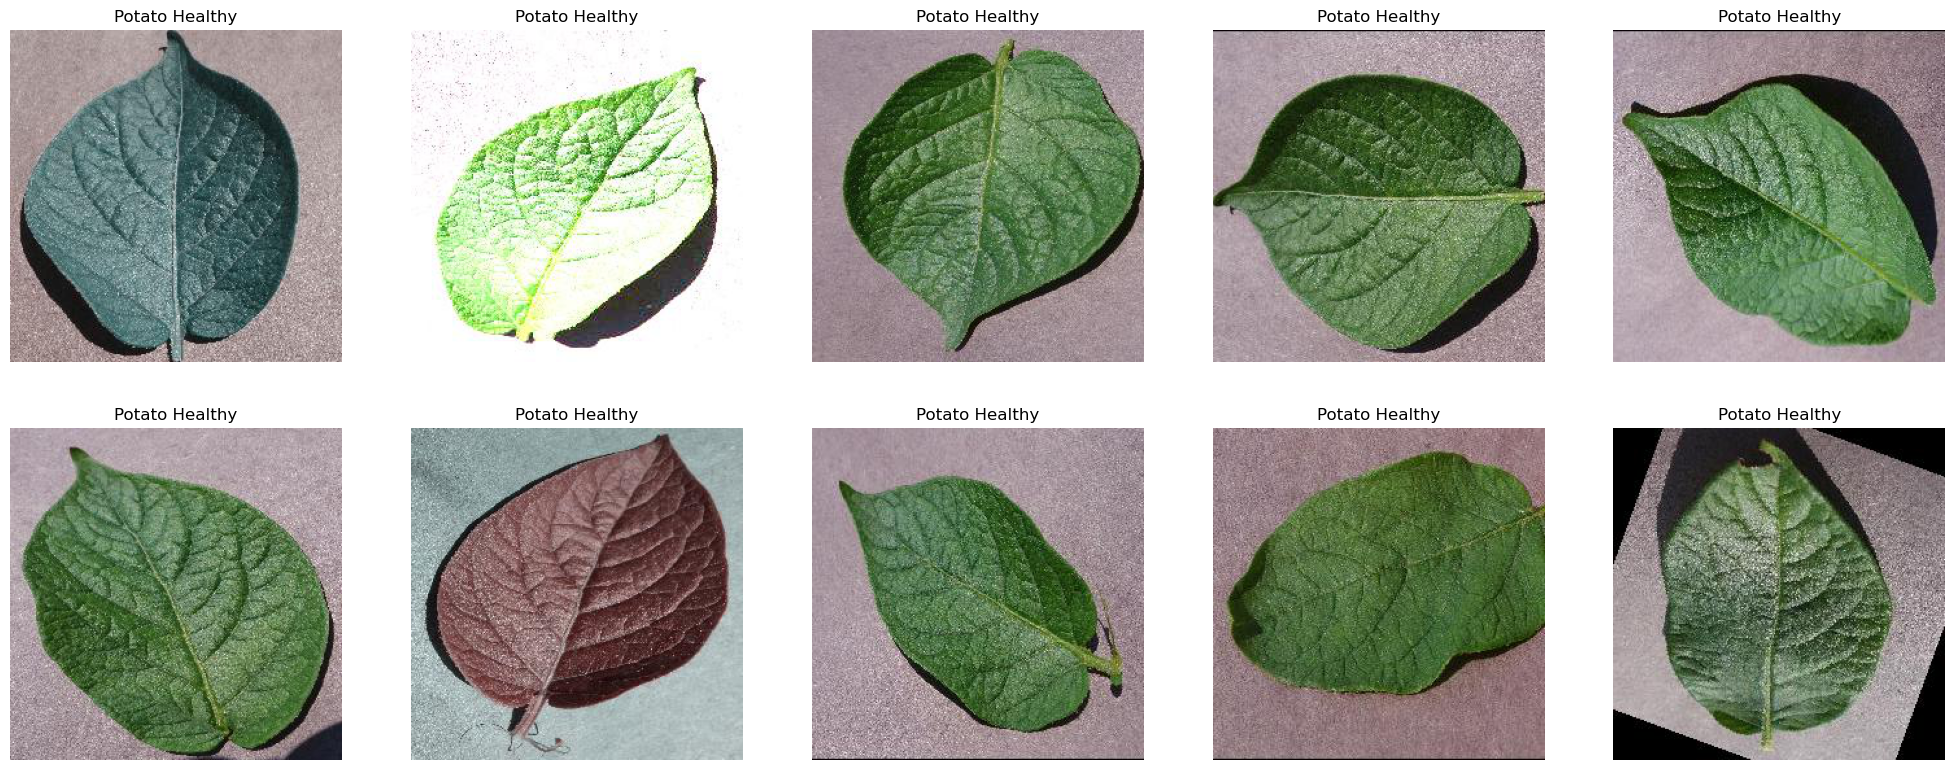

In [11]:
import random
plt.figure(figsize=(25,25))
temp = df[df["label"]==1]["images"]
start = random.randint(1,len(temp))
files = temp[start:start+10]

for index, file in enumerate(files):
    plt.subplot(5,5,index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title("Potato Healthy")
    plt.axis("off")

### **Printing images of leaves with Early Blight**

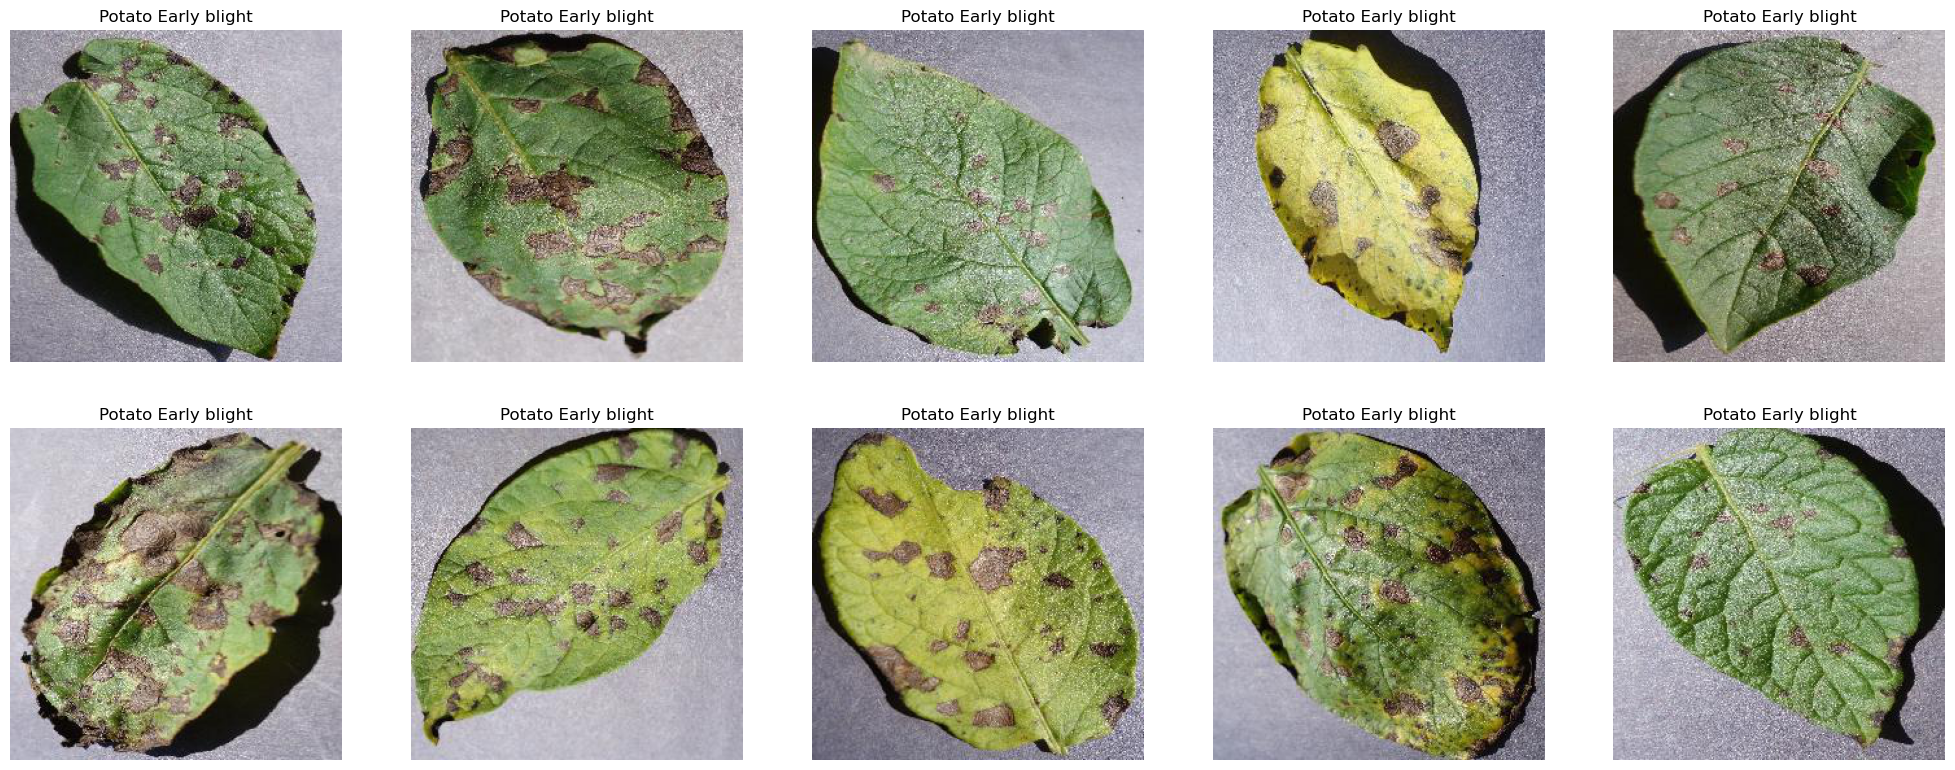

In [12]:
import random
plt.figure(figsize=(25,25))
temp = df[df["label"]==0]["images"]
start = random.randint(0,len(temp))
files = temp[start:start+10]

for index, file in enumerate(files):
    plt.subplot(5,5,index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title("Potato Early blight")
    plt.axis("off")

###**Printing images of leaves with Late Blight**

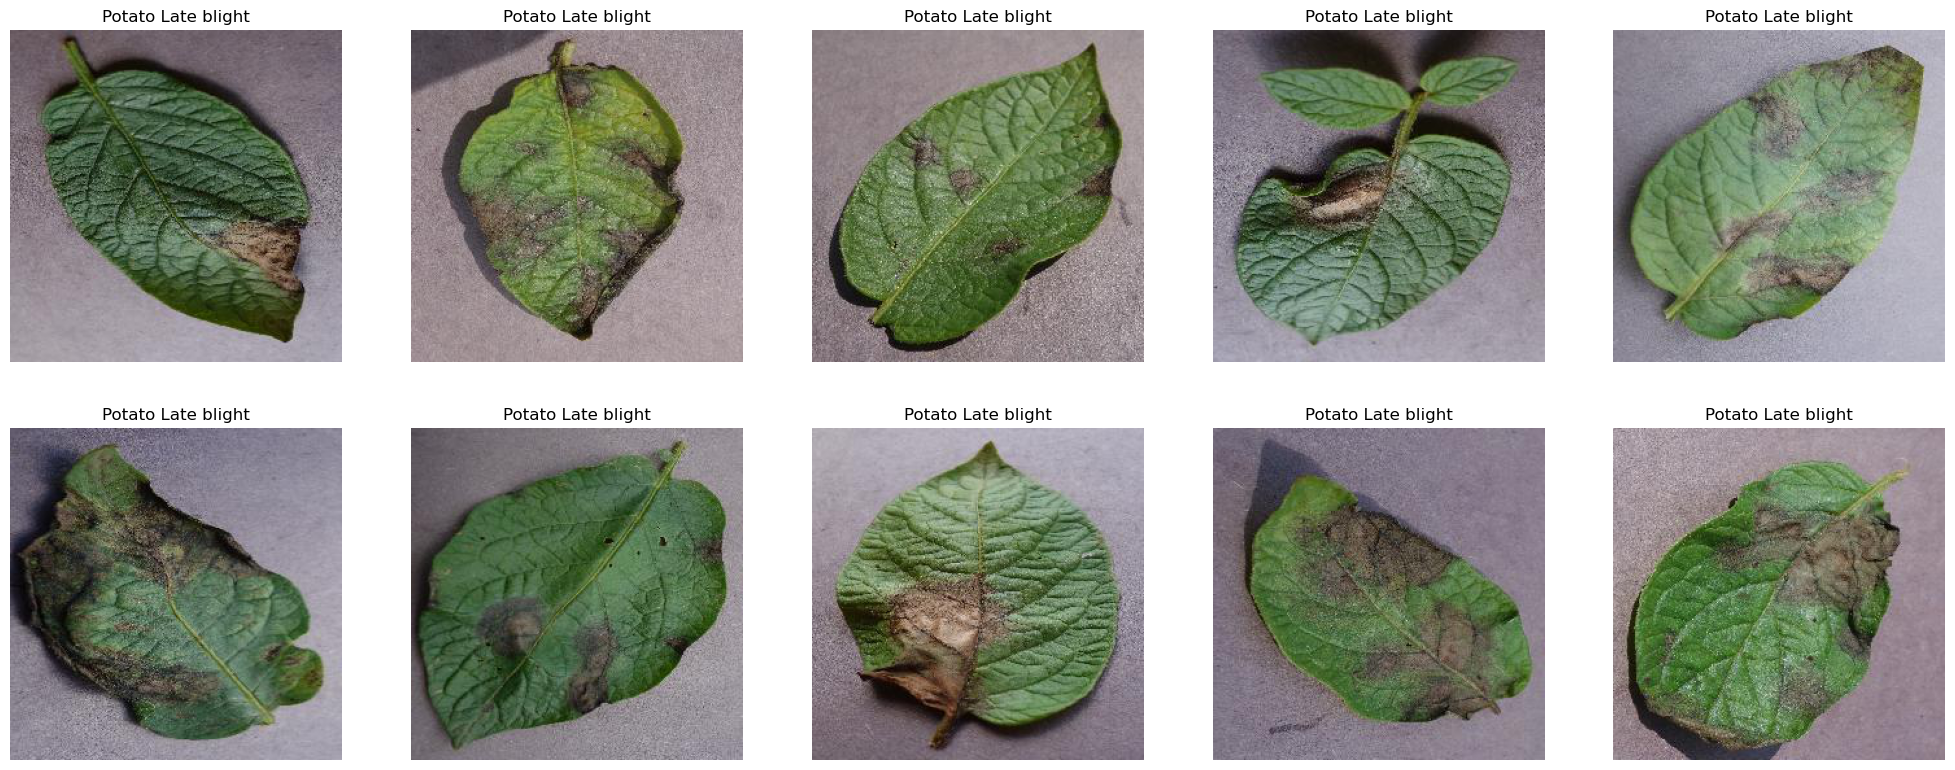

In [13]:
plt.figure(figsize=(25,25))
temp = df[df["label"]==2]["images"]
start = random.randint(1,len(temp))
files = temp[start:start+10]

for index, file in enumerate(files):
    plt.subplot(5,5,index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title("Potato Late blight")
    plt.axis("off")

### **Plotting the data distribution**

In [14]:
distribution = df["label"].value_counts()
distribution

2    3878
0    3878
1    3648
Name: label, dtype: int64

Text(0.5, 1.0, 'Bar Plot for Class Distribution')

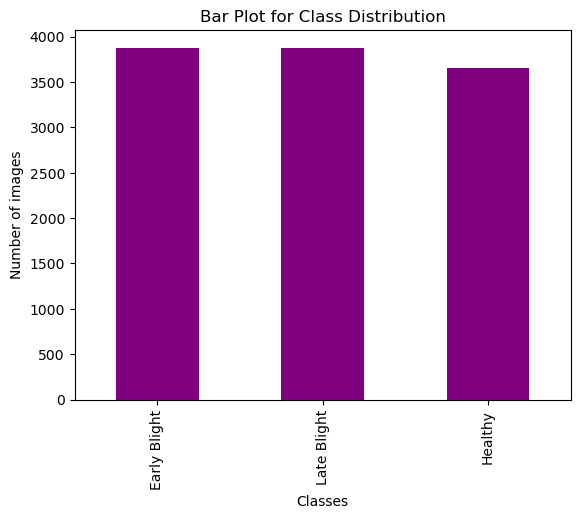

In [15]:
distribution.plot(kind = 'bar', color = 'purple')
labels = ["Early Blight", "Late Blight", "Healthy"]
plt.xlabel("Classes")
plt.ylabel("Number of images")
plt.xticks([0, 1, 2], labels, rotation='vertical')
plt.title("Bar Plot for Class Distribution")

# **Uploading the dataset for image processing**

In [16]:
data_dir = "D:\\Work\\My work\\Sem 3 research papers\\Potato leaf disease\\data"

In [17]:
dataset = image_dataset_from_directory(data_dir, labels="inferred", seed = 42,
                                           validation_split = 0.2, subset= 'both')

Found 11404 files belonging to 3 classes.
Using 9124 files for training.
Using 2280 files for validation.


In [18]:
train = dataset[0]
test = dataset[1]

In [19]:
class_names = train.class_names
print("Class names:", class_names)

Class names: ['Early_blight', 'Healthy', 'Late_blight']


In [20]:
model = Sequential([
                    Conv2D(16,(3,3),activation = "relu", input_shape = (256,256,3), padding = 'same'),
                    MaxPool2D((2,2)),
                    Conv2D(32,(3,3),activation="relu"),
                    MaxPool2D((2,2)),
                    Conv2D(64,(3,3),activation="relu"),
                    MaxPool2D((2,2)),
                    Conv2D(64,(3,3),activation="relu"),
                    MaxPool2D((2,2)),
                    Conv2D(32,(3,3),activation="relu"),
                    MaxPool2D((2,2)),
                    Flatten(),
                    Dense(64, activation="relu"),
                    Dense(3,activation="sigmoid"),
])

In [21]:
model.compile(loss= SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'], optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [22]:
history = model.fit(train, epochs=60)

Epoch 1/60
286/286 [==============================] - 512s 2s/step - loss: 1.0878 - accuracy: 0.6980
Epoch 2/60
286/286 [==============================] - 656s 2s/step - loss: 0.2270 - accuracy: 0.9187
Epoch 3/60
286/286 [==============================] - 519s 2s/step - loss: 0.1228 - accuracy: 0.9534
Epoch 4/60
286/286 [==============================] - 549s 2s/step - loss: 0.0884 - accuracy: 0.9694
Epoch 5/60
286/286 [==============================] - 663s 2s/step - loss: 0.0555 - accuracy: 0.9820
Epoch 6/60
286/286 [==============================] - 726s 3s/step - loss: 0.0202 - accuracy: 0.9938
Epoch 7/60
286/286 [==============================] - 578s 2s/step - loss: 0.0598 - accuracy: 0.9784
Epoch 8/60
286/286 [==============================] - 613s 2s/step - loss: 0.0114 - accuracy: 0.9966
Epoch 9/60
286/286 [==============================] - 595s 2s/step - loss: 0.0131 - accuracy: 0.9952
Epoch 10/60
286/286 [==============================] - 530s 2s/step - loss: 0.0418 - accura

In [50]:
model.fit(train, epochs=10)

Epoch 1/10
286/286 [==============================] - 436s 2s/step - loss: 3.3787e-08 - accuracy: 1.0000
Epoch 2/10
286/286 [==============================] - 550s 2s/step - loss: 2.8731e-08 - accuracy: 1.0000
Epoch 3/10
286/286 [==============================] - 795s 3s/step - loss: 2.4772e-08 - accuracy: 1.0000
Epoch 4/10
286/286 [==============================] - 681s 2s/step - loss: 2.0474e-08 - accuracy: 1.0000
Epoch 5/10
286/286 [==============================] - 529s 2s/step - loss: 1.7377e-08 - accuracy: 1.0000
Epoch 6/10
286/286 [==============================] - 509s 2s/step - loss: 1.5051e-08 - accuracy: 1.0000
Epoch 7/10
286/286 [==============================] - 618s 2s/step - loss: 1.2634e-08 - accuracy: 1.0000
Epoch 8/10
286/286 [==============================] - 523s 2s/step - loss: 1.0583e-08 - accuracy: 1.0000
Epoch 9/10
286/286 [==============================] - 439s 2s/step - loss: 9.0282e-09 - accuracy: 1.0000
Epoch 10/10
286/286 [==============================] - 

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [24]:
train_acc= model.evaluate(train)
print(train_acc)

286/286 [==============================] - 149s 516ms/step - loss: 3.4558e-08 - accuracy: 1.0000
[3.45581128158301e-08, 1.0]


In [51]:
test_acc= model.evaluate(test)
print(test_acc)

72/72 [==============================] - 37s 508ms/step - loss: 0.0133 - accuracy: 0.9982
[0.013270596042275429, 0.9982455968856812]


In [26]:
print(history)

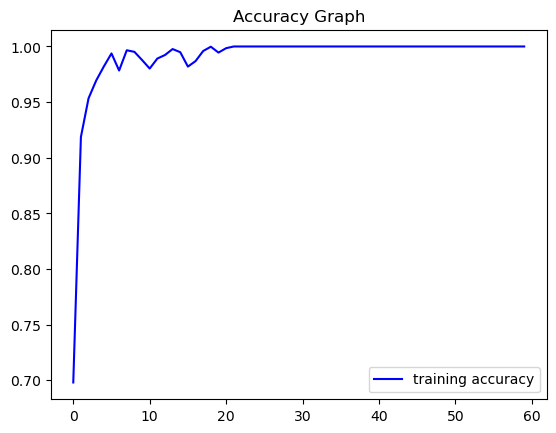

In [27]:
train_acc = history.history["accuracy"]
epochs = range(len(train_acc))

plt.plot(epochs, train_acc, "b", label= "training accuracy")
plt.title("Accuracy Graph")
plt.legend()
plt.show()

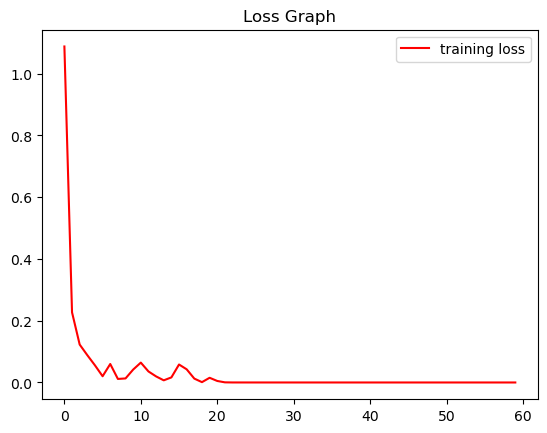

In [28]:
train_loss = history.history["loss"]
plt.plot(epochs, train_loss, "r" ,label="training loss")
plt.title("Loss Graph")
plt.legend()
plt.show()

In [29]:
predicted_probabilities = model.predict(test)

72/72 [==============================] - 36s 497ms/step


In [30]:
y_pred = []
for probabilities in predicted_probabilities:
    maximum = max(probabilities)
    probabilities = list(probabilities)
    index = probabilities.index(maximum)
    y_pred.append(index)

In [31]:
y_test = []
for images, labels in test.map(lambda x, y: (x, y)):
    for i in labels:
        y_test.append(i.numpy())

[[764   0   0]
 [  0 736   2]
 [  2   3 773]]


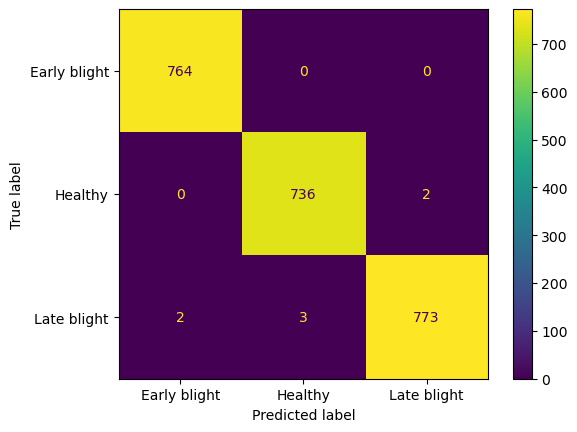

In [32]:
from sklearn.metrics import confusion_matrix, f1_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Early blight', 'Healthy', 'Late blight',])
print(cm)
cm_plot.plot()

In [33]:
l = len(cm)
labels = ['Early blight', 'Healthy', 'Late blight',]

In [34]:
f1 = f1_score(y_test, y_pred, average=None)

In [35]:
for i in range(l):
    row = cm[i]
    column = [row[i] for row in cm]
    diagonal = cm[i][i]

    precision = diagonal/sum(row)
    recall = diagonal/sum(column)
    print("For ", labels[i])
    print("Precision = ", precision)
    print("Recall = ", recall)
    print("F1 score = ", f1[i])
    print("\n")

For  Early blight
Precision =  1.0
Recall =  0.9973890339425587
F1 score =  0.9986928104575163


For  Healthy
Precision =  0.997289972899729
Recall =  0.9959404600811907
F1 score =  0.9966147596479351


For  Late blight
Precision =  0.993573264781491
Recall =  0.9974193548387097
F1 score =  0.9954925949774629




In [47]:
class_wise_probabilities = []
for i in range(l):
    temp = []
    for j in y_pred:
        if (j==i):
            temp.append(1)
        else:
            temp.append(0)

    class_wise_probabilities.append(temp)

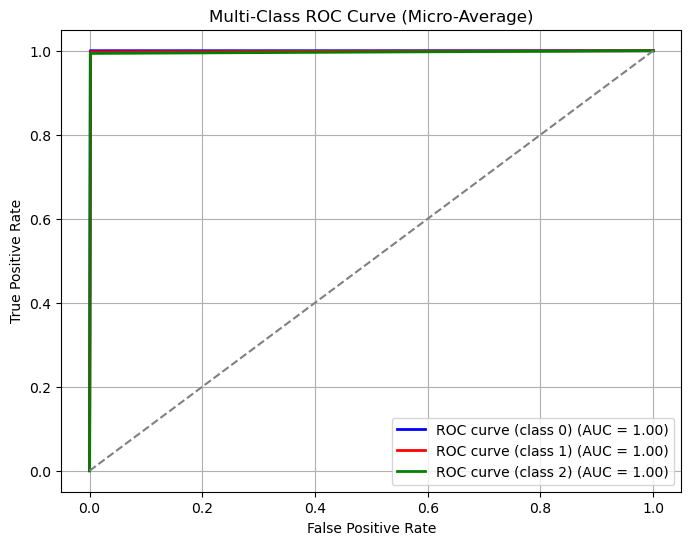

In [49]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

test_labels_bin = label_binarize(y_test, classes=range(l))

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(l):
    fpr[i], tpr[i], thresholds = roc_curve(test_labels_bin[:, i], class_wise_probabilities[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']

for i, color in zip(range(l), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label = f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve (Micro-Average)')
plt.legend(loc='lower right')
plt.grid()
plt.show()